<a href="https://colab.research.google.com/github/famirteimoury/Artificial-Intelligence/blob/main/Coot_optimization_algorihtm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import math 

In [59]:
class coot:
    def __init__(self, nvar, ub, lb):
        self.position = np.random.uniform (low = lb, high = ub, size = (1, nvar)) 
        self.cost = math.inf
    
    def check_boundaries (self):
      temp = np.array (self.position)
      for j in range (temp.shape [1]):
        temp [0, j] = max (temp [0, j], lb)
        temp [0, j] = min (temp [0, j], ub)
      self.position = temp


        

In [60]:
def cost_function (x):
    result = np.sum (np.power (x, 2))
    return result


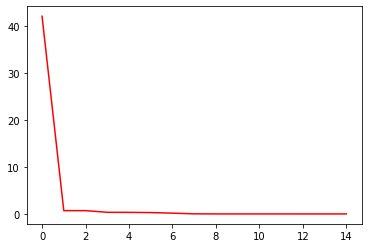

In [61]:
if __name__ == "__main__":
    
    #initialization of parameters
    
    num_var = 2
    num_pop = 20
    num_leader = math.ceil (0.1 * num_pop)
    num_coot = num_pop - num_leader
    ub = 10 
    lb = -10
    max_iter = 15
    it = 0
    coots = []
    leaders = []
    gbest = coot (num_var, ub, lb)
    BestCost = np.zeros ((max_iter, 1))
    for i in range (num_coot):
        coots.append (coot(num_var, ub, lb))
    for i in range (num_leader):
        leaders.append (coot(num_var, ub, lb))
    
    
    for i in range (num_coot):
        coots [i].cost = cost_function (coots [i].position)
        if coots [i].cost < gbest.cost:
            gbest = coots [i]
    for i in range (num_leader):
        leaders [i].cost = cost_function (leaders [i].position)
        if leaders [i].cost < gbest.cost:
            gbest = leaders [i]
    
    # main loop
    
    while it < max_iter:
        
        B = 2 - it * (1 / max_iter)
        A = 1 - it * ( 1 / max_iter)
        for i in range (num_coot):
            rand_num = np.random.uniform (low = 0, high = 1) 
            if rand_num < 0.5:
                R = np.random.uniform (low = -1, high = 1) 
                R1 = np.random.uniform (low = 0, high = 1) 
            else:
                R = np.random.uniform (low = -1, high = 1, size = (1, num_var)) 
                R1 = np.random.uniform (low = 0, high = 1, size = (1, num_var)) 
            k =  (i % num_leader)
            rand_num = np.random.uniform (low = 0, high = 1) 
            if rand_num < 0.5:
                
                coots [i].position = leaders [k].position + 2 * R1 * (np.cos (2 * np.pi * R)) * (leaders [k].position - coots [i].position)
                coots [i].check_boundaries ()
               
            else:
                
                rand_num = np.random.uniform (low = 0, high = 1) 
                if rand_num < 0.5 and i != 1:
                    coots [i].position = (coots [i].position + coots [i - 1].position) * 0.5
                else:
                    Q = np.random.uniform (low = lb, high = ub, size = (1, num_var)) 
                    coots [i].position = coots [i].position + A * R1 * (Q - coots [i].position)
                coots [i].check_boundaries ()
               
        #     % fitness of location of Coots
        for i in range (num_coot):
            coots [i].cost = cost_function (coots [i].position)
            k = (i % num_leader)
            # Update the location of coot
            if coots [i].cost < leaders [k].cost:
                temp = coots [i]
                coots [i] = leaders [k]
                leaders [k] = temp
        #    % fitness of location of Leaders
        for i in range (num_leader):
            rand_num = np.random.uniform (low = 0, high = 1) 
            if rand_num < 0.5:
                R = np.random.uniform (low = -1, high = 1) 
                R3 = np.random.uniform (low = 0, high = 1)  
            else:
                R = np.random.uniform (low = -1, high = 1, size = (1, num_var)) 
                R3 = np.random.uniform (low = 0, high = 1, size = (1, num_var)) 
           
            rand_num = np.random.uniform (low = 0, high = 1) 
            temp = coot (num_var, ub, lb)
            if rand_num < 0.5:
                temp.position = B * R3 * np.cos (2 * np.pi * R) * (gbest.position - leaders [i].position) + gbest.position 
            else:
                temp.position = B * R3 * np.cos (2 * np.pi * R) * (gbest.position - leaders [i].position) - gbest.position 
            
            
            for j in range (num_var):
                temp.position[0, j] = max (temp.position[0, j], lb)
                temp.position[0, j] = min (temp.position[0, j], ub) 
            temp.cost = cost_function (temp.position)
            # update the location of the leaders
            if temp.cost < gbest.cost:
                gbest = temp
        
        BestCost[it, 0] = gbest.cost
        it = it +1
    plt.plot (list(range(BestCost.shape [0])), np.reshape(BestCost,-1), label = "error", color = 'red')
    plt.show()

                
        


       